In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf #for determining (p,q) orders
from pmdarima import auto_arima #for determinig ARIMA orders

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("C:\\Users\\PRINCE\\Downloads\\AirPassengers.csv", index_col = 0 , parse_dates = True)

In [5]:
df.index.freq = 'MS'

In [6]:
df

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


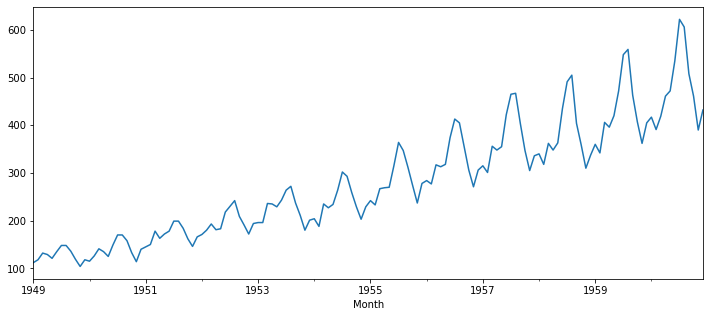

In [7]:
df['#Passengers'].plot(figsize = (12,5)).autoscale(axis = 'x', tight = True)

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose


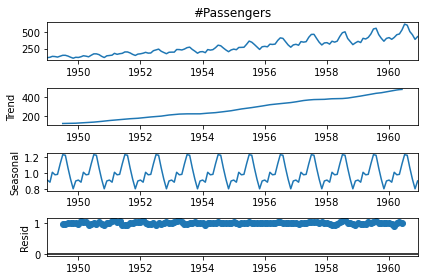

In [11]:
results = seasonal_decompose(df['#Passengers'],model = 'multiplicative')
results.plot();

In [12]:
stepwise_fit = auto_arima(df['#Passengers'], start_p = 1, start_q = 1,
                         max_p = 3, max_q = 3, m = 12,
                         start_P = 0, seasonal=True,
                         d = None, D = 1, trace = True,
                         error_action = 'ignore',
                         suppress_warnings= True,
                         stepwise = True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1022.896, Time=0.44 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.13 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.21 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1020.393, Time=0.06 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1019.239, Time=0.36 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=2.38 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1020.493, Time=0.46 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.23 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1021.120, Time=0.44 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1021.032, Time=0.57 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1019.178, Time=0.32 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1020.425, Time=0.16 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=1.78 sec
 ARIMA(0,1,1)(1,1,1)[12]     

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -505.589
Date:                             Tue, 04 Jan 2022   AIC                           1019.178
Time:                                     08:26:11   BIC                           1030.679
Sample:                                          0   HQIC                          1023.851
                                             - 144                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3634      0.074     -4.945      0.000      -0.508      -0.219
ar.S.L12      -0.1239      0.090     -1.372      0.170      -0.301       0.053
ar.S.L24       0.1911      0.107      1.783      0.075      -0.019       0.401
sigma2       130.4480     15.527      8.402      0.000     100.016     160.880
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 4.59
Prob(Q):                              0.92   Prob(JB):                         0.10
Heteroskedasticity (H):               2.70   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [13]:
from statsmodels.tsa.statespace.tools import diff
#df['d1'] = diff(df['#Passengers'], k_diff = 1)

In [14]:
from statsmodels.tsa.stattools import adfuller
print('Augmented Dickey-Fuller Test on Airline Data')
dftest = adfuller(df['#Passengers'], autolag = 'AIC')
dftest

Augmented Dickey-Fuller Test on Airline Data


(0.8153688792060488,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.6929308390189)

In [15]:
print('Augmented Dickey-Fuller Test on Airline Data')

dfout = pd.Series(dftest[0:4], index = ['ADF test stats' , 'p-value', '# lags used', '# observations'])

for key, val in dftest[4].items():
    dfout[f'critical value({key})'] = val
print(dfout)

Augmented Dickey-Fuller Test on Airline Data
ADF test stats           0.815369
p-value                  0.991880
# lags used             13.000000
# observations         130.000000
critical value(1%)      -3.481682
critical value(5%)      -2.884042
critical value(10%)     -2.578770
dtype: float64


In [16]:
from statsmodels.tsa.stattools import acf , pacf
acf(df['#Passengers'])

array([1.        , 0.94804734, 0.87557484, 0.80668116, 0.75262542,
       0.71376997, 0.6817336 , 0.66290439, 0.65561048, 0.67094833,
       0.70271992, 0.74324019, 0.76039504, 0.71266087, 0.64634228,
       0.58592342, 0.53795519, 0.49974753, 0.46873401, 0.44987066,
       0.4416288 , 0.45722376, 0.48248203, 0.51712699, 0.53218983,
       0.49397569, 0.43772134, 0.3876029 , 0.34802503, 0.31498388,
       0.28849682, 0.27080187, 0.26429011, 0.27679934, 0.2985215 ,
       0.32558712, 0.3370236 , 0.30333486, 0.25397708, 0.21065534,
       0.17217092])

In [17]:
pacf(df['#Passengers'])

array([ 1.00000000e+00,  9.54677042e-01, -2.65277317e-01,  5.54695472e-02,
        1.08856215e-01,  8.11257853e-02,  4.12540544e-03,  1.56169553e-01,
        1.03708330e-01,  2.88781439e-01,  2.06918048e-01,  2.41129704e-01,
       -1.58004984e-01, -7.18324604e-01, -8.94806410e-02,  2.21605913e-01,
        1.34622533e-01,  1.15615719e-01,  1.94829396e-01,  9.66561845e-02,
       -2.02158680e-01, -9.36381005e-02, -3.45594572e-01, -1.06170206e-01,
        2.77804723e-01,  5.87815922e-02,  9.86624045e-03,  2.37687367e-01,
        9.40568218e-02, -1.47505422e-01, -1.88609051e-01, -2.52801158e-01,
       -2.57153789e-01, -1.40349613e-01,  1.88263087e-01,  1.30686258e-01,
        5.23902189e-01,  6.91426442e-01,  9.91163921e-01,  3.71021065e+01,
       -8.85334119e-01])

In [18]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

In [19]:
df

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


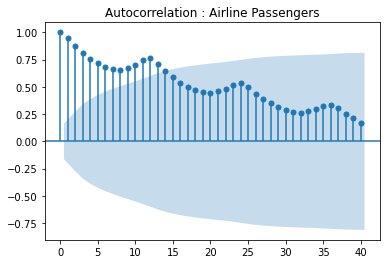

In [20]:
title = 'Autocorrelation : Airline Passengers'
lags = 40
plot_acf(df,title = title , lags = lags);

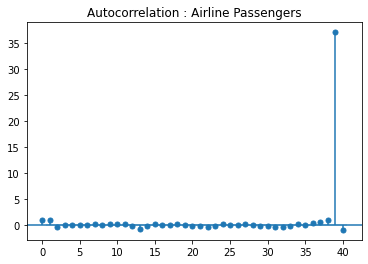

In [21]:
plot_pacf(df['#Passengers'], title = title, lags = lags);

In [31]:
# people.duke.edu -- 6th rule

In [22]:
train = df.iloc[:132]
test = df.iloc[132:]

In [23]:
model = ARIMA(train['#Passengers'], order = (0,1,1))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.#Passengers   No. Observations:                  131
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -629.369
Method:                       css-mle   S.D. of innovations             29.513
Date:                Tue, 04 Jan 2022   AIC                           1264.738
Time:                        08:29:10   BIC                           1273.363
Sample:                    02-01-1949   HQIC                          1268.243
                         - 12-01-1959                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.3901      3.528      0.677      0.498      -4.526       9.306
ma.L1.D.#Passengers     0.3711      0.092      4.037      0.000       0.191       0.551
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -2.6949           +0.0000j            2.6949            0.5000
-----------------------------------------------------------------------------
"""

In [24]:
start = len(train)
end = len(train) + len(test) - 1
predictions = results.predict(start = start, end = end , dynamic = False , typ = 'levels').rename('ARIMA(0,1,1) Predictions')

In [25]:
for i in range(len(predictions)):
    print(f"predicted = {predictions[i]}, expected = {test['#Passengers'][i]}")

predicted = 427.7705064701977, expected = 417
predicted = 430.1605758528501, expected = 391
predicted = 432.55064523550254, expected = 419
predicted = 434.94071461815497, expected = 461
predicted = 437.3307840008074, expected = 472
predicted = 439.7208533834598, expected = 535
predicted = 442.11092276611225, expected = 622
predicted = 444.5009921487647, expected = 606
predicted = 446.8910615314171, expected = 508
predicted = 449.28113091406954, expected = 461
predicted = 451.67120029672196, expected = 390
predicted = 454.0612696793744, expected = 432


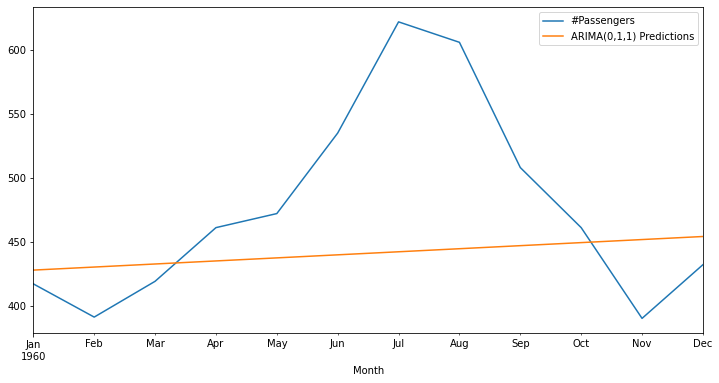

In [26]:
ax = test['#Passengers'].plot(legend = True , figsize = (12,6))
predictions.plot(legend = True)
ax.autoscale(axis = 'x', tight = True)

In [27]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(test['#Passengers'], predictions)
print(f'ARIMA(0,1,1) MSE Error : {error }')

ARIMA(0,1,1) MSE Error : 6616.334302828735


In [28]:
from statsmodels.tools.eval_measures import rmse

error = rmse(test['#Passengers'], predictions)
print(f'ARIMA(1,1,1) RMSE Error : {error:11.10}')

ARIMA(1,1,1) RMSE Error : 81.34085261


# Retrain the model on the full data, and forecast the future

In [29]:
model = ARIMA(df['#Passengers'], order = (1,1,0))
results = model.fit()

fcast = results.predict(len(df), len(df)+12*10 , typ = 'levels').rename('ARIMA(1,1,0) Forecast')

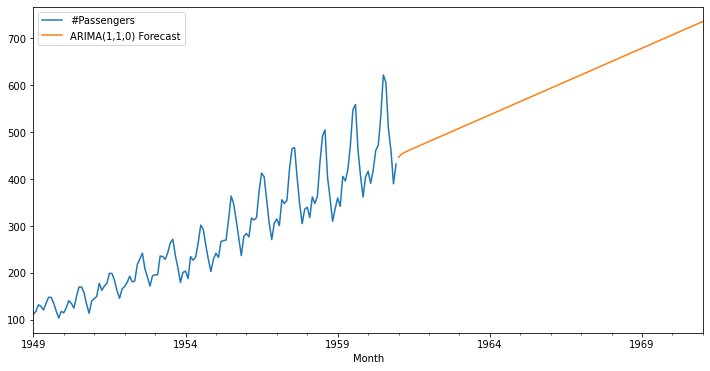

In [30]:
ax = df['#Passengers'].plot(legend = True, figsize = (12,6))
fcast.plot(legend = True)
ax.autoscale(axis= 'x', tight = True)

In [31]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [32]:
model = SARIMAX (train['#Passengers'], order = (1,1,0), seasonal_order = (2,1,1,2), enforce_invertibility = False)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                         #Passengers   No. Observations:                  132
Model:             SARIMAX(1, 1, 0)x(2, 1, [1], 2)   Log Likelihood                -619.132
Date:                             Tue, 04 Jan 2022   AIC                           1248.263
Time:                                     08:32:19   BIC                           1262.562
Sample:                                 01-01-1949   HQIC                          1254.073
                                      - 12-01-1959                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2820      0.102      2.777      0.005       0.083       0.481
ar.S.L2       -0.1888      0.090     -2.088      0.037      -0.366      -0.012
ar.S.L4       -0.3229      0.107     -3.026      0.002      -0.532      -0.114
ma.S.L2       -1.0000    588.017     -0.002      0.999   -1153.491    1151.491
sigma2       797.0121   4.69e+05      0.002      0.999   -9.18e+05    9.19e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):                 2.43
Prob(Q):                              0.73   Prob(JB):                         0.30
Heteroskedasticity (H):               7.72   Skew:                             0.08
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [33]:
start = len(train)
end = len(train) + len(test) - 1
prediction = results.predict(start = start, end = end , dynamic = False , typ = 'levels').rename('SARIMAX(1,1,0) Predictions')

In [34]:
for i in range(len(prediction)):
    print(f"pedicted = {prediction[i]}, expected = {test['#Passengers'][i]}")

pedicted = 455.9759326427129, expected = 417
pedicted = 473.4170667911081, expected = 391
pedicted = 481.7672488726674, expected = 419
pedicted = 469.79489476877023, expected = 461
pedicted = 454.5575513854245, expected = 472
pedicted = 456.21089027933556, expected = 535
pedicted = 459.1405203655234, expected = 622
pedicted = 467.7062440121911, expected = 606
pedicted = 474.81992229281656, expected = 508
pedicted = 477.6794811782762, expected = 461
pedicted = 478.1362658272664, expected = 390
pedicted = 479.8405633783888, expected = 432


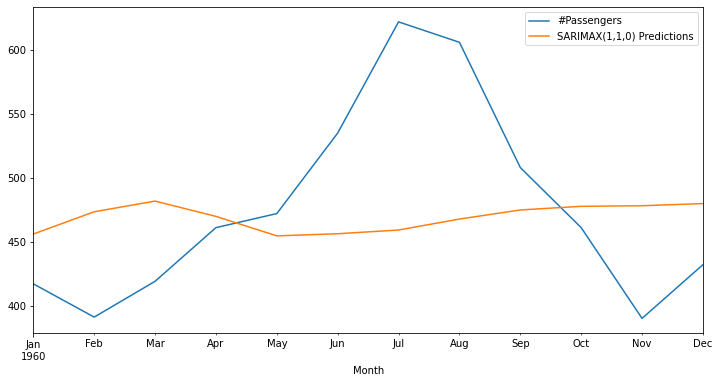

In [35]:
ax = test['#Passengers'].plot(legend = True , figsize = (12,6))
prediction.plot(legend = True)
ax.autoscale(axis = 'x', tight = True)

In [36]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(test['#Passengers'], prediction)
print(f'ARIMA(0,1,1) MSE Error : {error }')

ARIMA(0,1,1) MSE Error : 6327.079442708244


In [37]:
from statsmodels.tools.eval_measures import rmse

error = rmse(test['#Passengers'], predictions)
print(f'ARIMA(1,1,1) RMSE Error : {error:11.10}')

ARIMA(1,1,1) RMSE Error : 81.34085261


In [38]:
model = SARIMAX (df['#Passengers'], order = (1,1,0), seasonal_order = (2,1,1,12), enforce_invertibility = False)
result = model.fit()

Fcast = result.predict(len(df), len(df)+12*10 , typ = 'levels').rename('SARIMAX(1,1,0) Forecast')

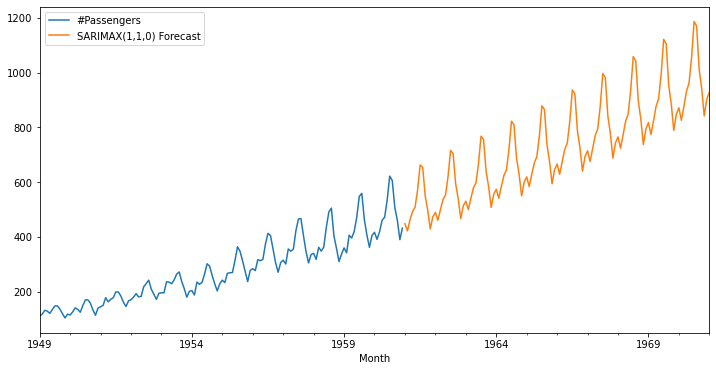

In [39]:
ax = df['#Passengers'].plot(legend = True, figsize = (12,6))
Fcast.plot(legend = True)
ax.autoscale(axis= 'x', tight = True)